In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

In [2]:
# Likelihood function
def normal(m,c,x,y,len):
    sum=0
    for i in range(len):
        sum = sum + np.square(y[i]-(m*x[i])-c)  
    return np.exp(-sum/2) # Gaussian distribution with zero mean and variance 1
#can send variance and mean as arguments as well

In [3]:
def line(x,m,c):
    return m*x+c

In [4]:
n = 100000
m = np.zeros(n)
c = np.zeros(n)
m[0] = 1
c[0]=1
kount = 0

#Defining the data points for a line with slope 3 and intercept 4
x = np.arange(0,10,0.5)
len=x.size
y = 3*x + 4 
y_noise=np.zeros(len)
for i in range(len):
    y_noise[i]=y[i]+np.random.normal(0,1)

Text(0, 0.5, 'y')

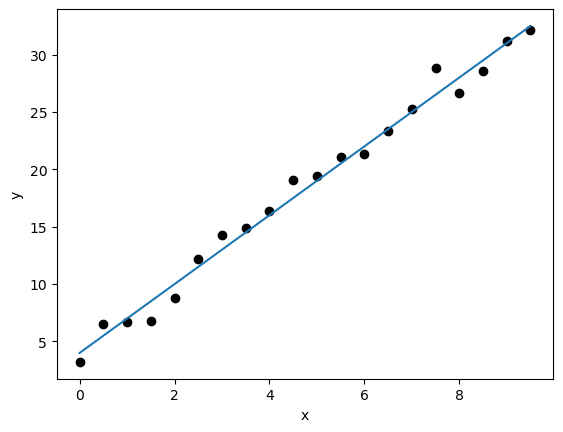

In [10]:
#plotting the data
plt.plot(x,y)
plt.scatter(x,y_noise,color='black')
plt.xlabel('x')
plt.ylabel('y')

In [11]:
#Fitting the data with a straight line using scipy
parameters, covariance = curve_fit(line,x,y_noise)
fitm = parameters[0]
fitc=parameters[1]
print(fitm)
print(fitc)


3.0137742464168245
4.022635609499564


In [12]:
for i in range(1,n):
    delx = np.random.normal(0,1)
    theta = 2*np.pi*np.random.uniform()
    mstar = m[i-1] + delx*np.cos(theta)
    cstar = c[i-1] + delx*np.sin(theta)
    alpha = np.random.uniform()
    ratio = normal(mstar,cstar,x,y_noise,len)/normal(m[i-1],c[i-1],x,y_noise,len)
 
    #Metropolis acceptance step
    if alpha<min(1,ratio):               
        m[i]=mstar
        c[i]=cstar
        kount = kount+1
    else:
         m[i]=m[i-1]
         c[i] = c[i-1]
          

print('Ratio of samples accepted to the total samples')       
print(kount/n)

C:\Users\Vaishali\AppData\Local\Temp\ipykernel_21264\1606733654.py:7: RuntimeWarning: invalid value encountered in double_scalars
  ratio = normal(mstar,cstar,x,y_noise,len)/normal(m[i-1],c[i-1],x,y_noise,len)
C:\Users\Vaishali\AppData\Local\Temp\ipykernel_21264\1606733654.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = normal(mstar,cstar,x,y_noise,len)/normal(m[i-1],c[i-1],x,y_noise,len)


Ratio of samples accepted to the total samples
0.22894


In [24]:
burnin=30000
#plt.scatter(m[burnin:],c[burnin:],s=0.25)

3.08465861021901 3.3561079670613543


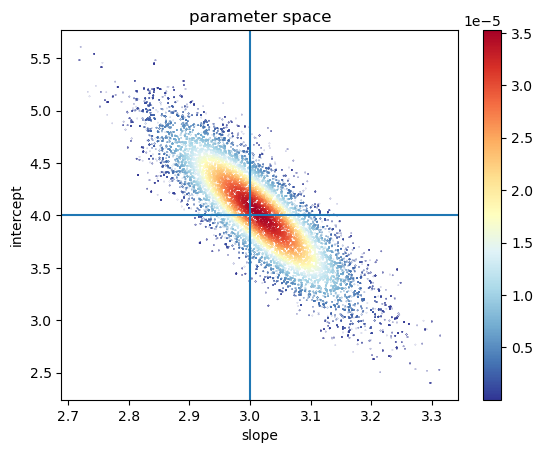

In [30]:
prob = normal(m[burnin:],c[burnin:],x,y_noise,len)
i = np.argmax(prob)
print(m[i],c[i])
plt.scatter(m[burnin:],c[burnin:],c=prob,cmap='RdYlBu_r',s=0.01)
plt.axhline(y=4,xmin=0,xmax=3.0)
plt.axvline(x=3,ymin=0,ymax=4.0)
plt.title('parameter space')
plt.xlabel('slope')
plt.ylabel('intercept')
plt.colorbar()
plt.show()

In [34]:
#Distributions of the slope and intercept
mean_m=np.mean(m)
mean_c=np.mean(c)
std_m=np.std(m)
std_c=np.std(c)
print(mean_m)
print(mean_c)
act_m=3
act_c=4


3.0113937729176685
4.039086613627391


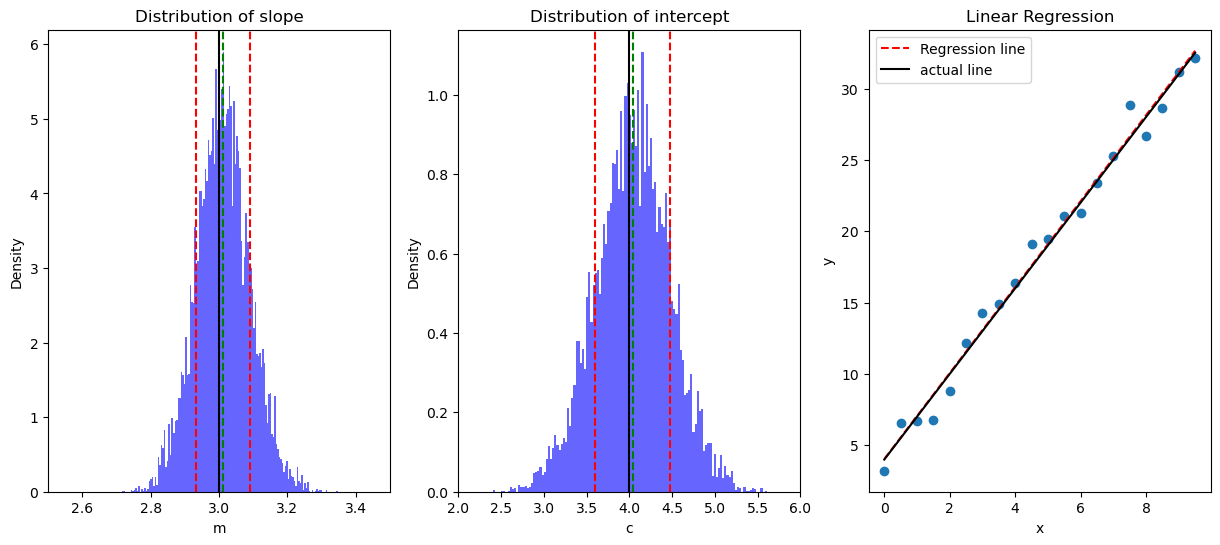

In [44]:
#Distribution of m
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.hist(m,bins='auto',density=True,alpha=0.6,color='blue')
plt.axvline(mean_m,color='green',linestyle='dashed')
plt.axvline(act_m,color='black')
plt.axvline(mean_m+std_m,color='red',linestyle='dashed')
plt.axvline(mean_m-std_m,color='red',linestyle='dashed')
plt.xlim(2.5,3.5)
plt.title('Distribution of slope')
plt.xlabel('m')
plt.ylabel('Density')

#Distribution of c
plt.subplot(1,3,2)
plt.hist(c,bins='auto',density=True,alpha=0.6,color='blue')
plt.axvline(mean_c,color='green',linestyle='dashed')
plt.axvline(act_c,color='black')
plt.axvline(mean_c+std_c,color='red',linestyle='dashed')
plt.axvline(mean_c-std_c,color='red',linestyle='dashed')
plt.xlim(2,6)
plt.title('Distribution of intercept')
plt.xlabel('c')
plt.ylabel('Density')

#Linear Regression
plt.subplot(1,3,3)
plt.plot(x,mean_m*x+mean_c,color='red',linestyle='dashed',label='Regression line')
plt.scatter(x,y_noise)
plt.plot(x,y,color='black',label='actual line')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


Text(0, 0.5, 'slope')

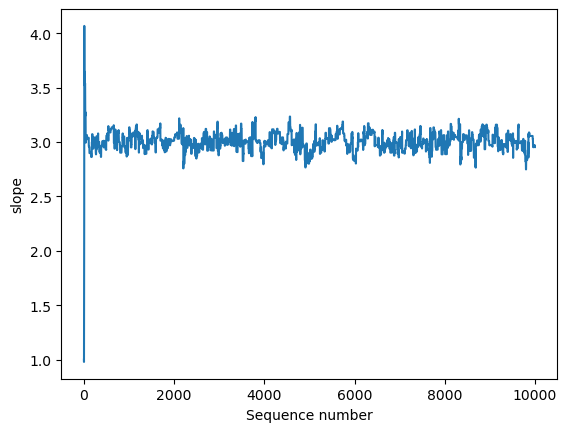

In [45]:
#Acceptance probability
plt.plot(m[:10000])
plt.xlabel('Sequence number')
plt.ylabel('slope')